# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [281]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [283]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size= 1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size= 1500)
lat_lngs = zip(lats, lngs)

lat_lngs

In [284]:
# Empty list for holding the cities names
cities = []

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


In [285]:
cities

['kailua-kona',
 'thompson',
 'georgetown',
 'remire-montjoly',
 'port lincoln',
 'chorbane',
 'belgrade',
 'iskateley',
 'altay',
 'waitangi',
 'hamilton',
 'pandan',
 'bilibino',
 'blackmans bay',
 'edinburgh of the seven seas',
 'port-aux-francais',
 'atafu village',
 'correntina',
 'tobelo',
 'ardestan',
 'olonkinbyen',
 'ampanihy',
 'margaret river',
 'petropavlovsk-kamchatsky',
 'plastun',
 'dhidhdhoo',
 'flying fish cove',
 'hermanus',
 'la passe',
 'taiohae',
 'berezovyy',
 "kolyvan'",
 'hami',
 'mermoz boabab',
 'kidal',
 'hawaiian paradise park',
 'grytviken',
 'adamstown',
 'puerto ayora',
 'fomboni',
 'yayva',
 'uturoa',
 'pontes e lacerda',
 'jining',
 'punta arenas',
 'vila franca do campo',
 'albany',
 'rio claro',
 'port mathurin',
 'bethel',
 'ribeira grande',
 'papatowai',
 'lebu',
 'invercargill',
 'tiksi',
 'chonchi',
 'tranovaho',
 'kenai',
 'sitka',
 'kourou',
 'edgewater',
 'geraldton',
 'narasannapeta',
 'daru',
 'dudinka',
 'inari',
 'melo',
 'conception bay so

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [286]:
# Set the API base URL
BASE_URL = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = BASE_URL + "&q=" + city
    #print(city_url)

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json["coord"]["lat"]
        city_lng = city_weather_json["coord"]["lon"]
        city_max_temp = city_weather_json["main"]["temp_max"]
        city_humidity = city_weather_json["main"]["humidity"]
        city_clouds = city_weather_json["clouds"]["all"]
        city_wind = city_weather_json["wind"]["speed"]
        city_country = city_weather_json["sys"]["country"]
        city_date = city_weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError: 
        print("City not found. Skipping...")
        
        
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kailua-kona
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | georgetown
Processing Record 4 of Set 1 | remire-montjoly
Processing Record 5 of Set 1 | port lincoln
Processing Record 6 of Set 1 | chorbane
Processing Record 7 of Set 1 | belgrade
Processing Record 8 of Set 1 | iskateley
Processing Record 9 of Set 1 | altay
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | hamilton
Processing Record 12 of Set 1 | pandan
Processing Record 13 of Set 1 | bilibino
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | atafu village
Processing Record 18 of Set 1 | correntina
Processing Record 19 of Set 1 | tobelo
Processing Record 20 of Set 1 | ardestan
Processing Record 21 of Set 1 | olonkinbyen
Processing Record 22 of Set 1 | amp

Processing Record 41 of Set 4 | tolanaro
Processing Record 42 of Set 4 | nema
Processing Record 43 of Set 4 | shohimardon
Processing Record 44 of Set 4 | st. john's
Processing Record 45 of Set 4 | kavieng
Processing Record 46 of Set 4 | guixi
Processing Record 47 of Set 4 | hola
Processing Record 48 of Set 4 | talnakh
Processing Record 49 of Set 4 | opuwo
Processing Record 0 of Set 5 | guiberoua
Processing Record 1 of Set 5 | bemidji
Processing Record 2 of Set 5 | katima mulilo
Processing Record 3 of Set 5 | as-suwayda
Processing Record 4 of Set 5 | reuleuet
Processing Record 5 of Set 5 | altai
Processing Record 6 of Set 5 | nchelenge
Processing Record 7 of Set 5 | kingston
Processing Record 8 of Set 5 | nanakuli
Processing Record 9 of Set 5 | sao paulo de olivenca
Processing Record 10 of Set 5 | ippy
Processing Record 11 of Set 5 | vadso
Processing Record 12 of Set 5 | ahau
City not found. Skipping...
Processing Record 13 of Set 5 | pisco
Processing Record 14 of Set 5 | axim
Processin

Processing Record 34 of Set 8 | palikir - national government center
Processing Record 35 of Set 8 | eraan
Processing Record 36 of Set 8 | sorong
Processing Record 37 of Set 8 | fort bragg
Processing Record 38 of Set 8 | ijuw
City not found. Skipping...
Processing Record 39 of Set 8 | prince albert
Processing Record 40 of Set 8 | santa elena de uairen
Processing Record 41 of Set 8 | shakawe
Processing Record 42 of Set 8 | ribas do rio pardo
Processing Record 43 of Set 8 | bel ombre
Processing Record 44 of Set 8 | boulder city
Processing Record 45 of Set 8 | wakkanai
Processing Record 46 of Set 8 | siwa oasis
Processing Record 47 of Set 8 | zhangye
Processing Record 48 of Set 8 | weno
Processing Record 49 of Set 8 | buritizeiro
Processing Record 0 of Set 9 | idri
Processing Record 1 of Set 9 | zuenoula
Processing Record 2 of Set 9 | mount pearl
Processing Record 3 of Set 9 | kuta
Processing Record 4 of Set 9 | malanje
Processing Record 5 of Set 9 | kalmunai
Processing Record 6 of Set 9 

Processing Record 23 of Set 12 | minas de marcona
Processing Record 24 of Set 12 | mtwango
Processing Record 25 of Set 12 | myeik
Processing Record 26 of Set 12 | chicxulub puerto
City not found. Skipping...
Processing Record 27 of Set 12 | prince rupert
Processing Record 28 of Set 12 | kruisfontein
Processing Record 29 of Set 12 | arawa
Processing Record 30 of Set 12 | ephrata
Processing Record 31 of Set 12 | saldanha
Processing Record 32 of Set 12 | novyy urgal
Processing Record 33 of Set 12 | dolyna
Processing Record 34 of Set 12 | nikolayevsk-on-amure
Processing Record 35 of Set 12 | kavaratti
Processing Record 36 of Set 12 | narrabri
Processing Record 37 of Set 12 | el calafate
Processing Record 38 of Set 12 | saint-pourcain-sur-sioule
Processing Record 39 of Set 12 | manado
Processing Record 40 of Set 12 | leava
Processing Record 41 of Set 12 | okhotsk
Processing Record 42 of Set 12 | mhamid
Processing Record 43 of Set 12 | arteche
-----------------------------
Data Retrieval Com

In [287]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =  pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [288]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kailua-kona,19.6406,-155.9956,26.98,77,40,3.09,US,1706844624
1,thompson,55.7435,-97.8558,-8.91,92,100,3.60,CA,1706844911
2,georgetown,5.4112,100.3354,30.96,70,20,3.60,MY,1706844622
3,remire-montjoly,4.9167,-52.2667,23.02,100,100,0.00,GF,1706844902
4,port lincoln,-34.7333,135.8667,21.44,66,45,4.35,AU,1706844911


In [289]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [290]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kailua-kona,19.6406,-155.9956,26.98,77,40,3.09,US,1706844624
1,thompson,55.7435,-97.8558,-8.91,92,100,3.60,CA,1706844911
2,georgetown,5.4112,100.3354,30.96,70,20,3.60,MY,1706844622
3,remire-montjoly,4.9167,-52.2667,23.02,100,100,0.00,GF,1706844902
4,port lincoln,-34.7333,135.8667,21.44,66,45,4.35,AU,1706844911


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

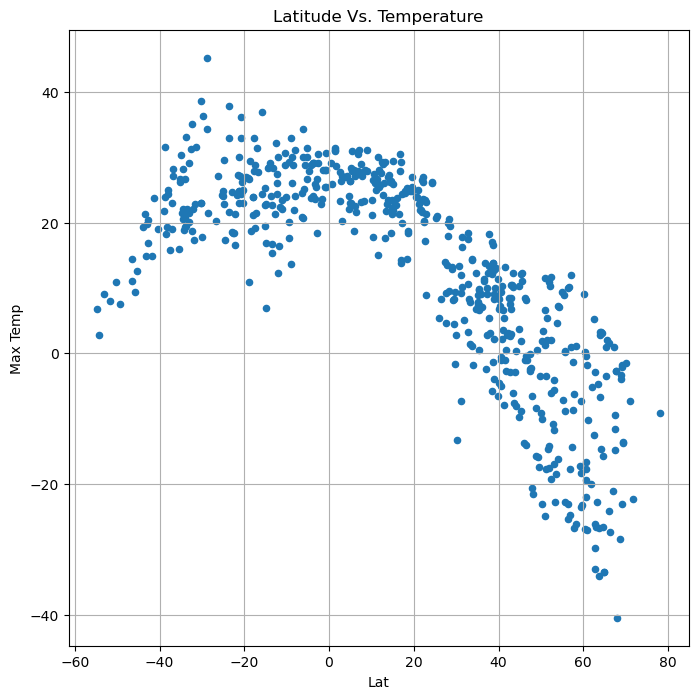

In [291]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(8,8),title="Latitude Vs. Temperature")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

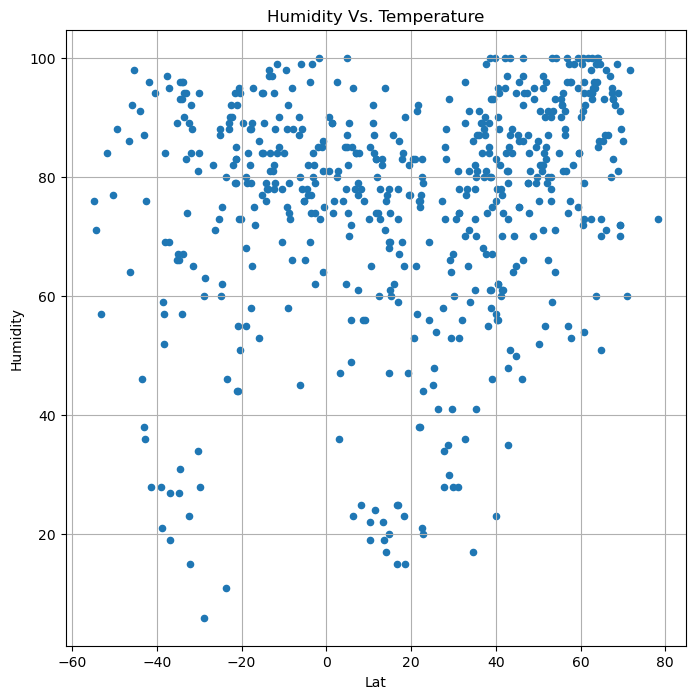

In [292]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(8,8),title="Humidity Vs. Temperature")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

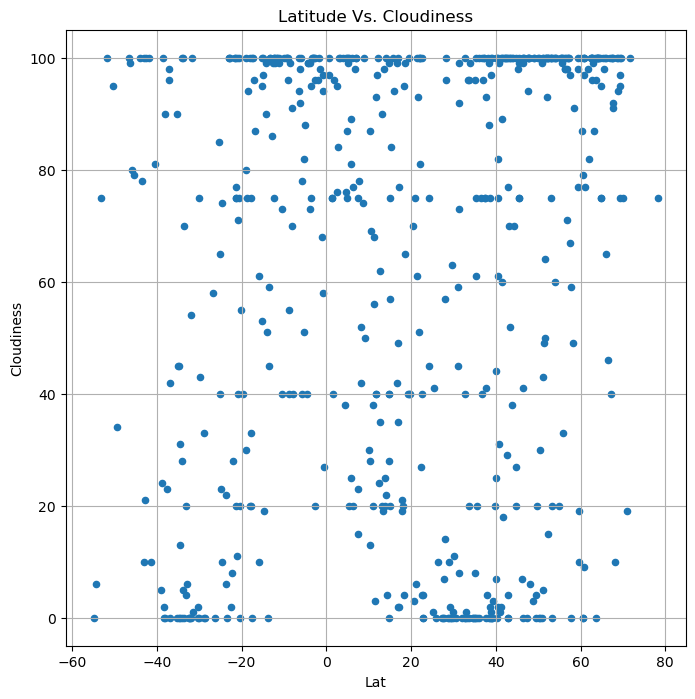

In [293]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(8,8),title="Latitude Vs. Cloudiness")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

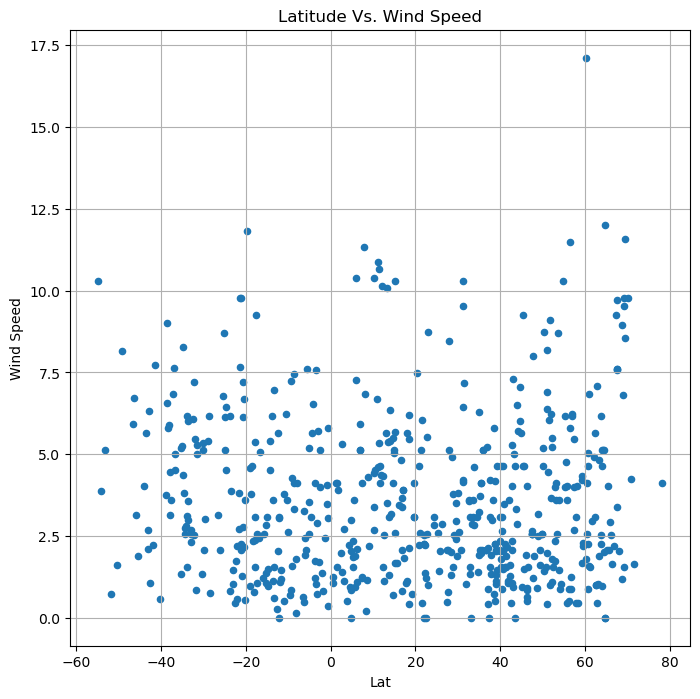

In [294]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(8,8),title="Latitude Vs. Wind Speed")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [295]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [296]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kailua-kona,19.6406,-155.9956,26.98,77,40,3.09,US,1706844624
1,thompson,55.7435,-97.8558,-8.91,92,100,3.60,CA,1706844911
2,georgetown,5.4112,100.3354,30.96,70,20,3.60,MY,1706844622
3,remire-montjoly,4.9167,-52.2667,23.02,100,100,0.00,GF,1706844902
5,chorbane,35.2858,10.3858,9.74,80,61,3.71,TN,1706844911


In [297]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,port lincoln,-34.7333,135.8667,21.44,66,45,4.35,AU,1706844911
9,waitangi,-43.9535,-176.5597,19.34,91,100,4.02,NZ,1706844798
13,blackmans bay,-43.0167,147.3167,19.74,38,10,2.68,AU,1706844912
14,edinburgh of the seven seas,-37.0676,-12.3116,19.00,95,98,7.64,SH,1706844793
15,port-aux-francais,-49.3500,70.2167,7.53,88,34,8.16,TF,1706844913


###  Temperature vs. Latitude Linear Regression Plot

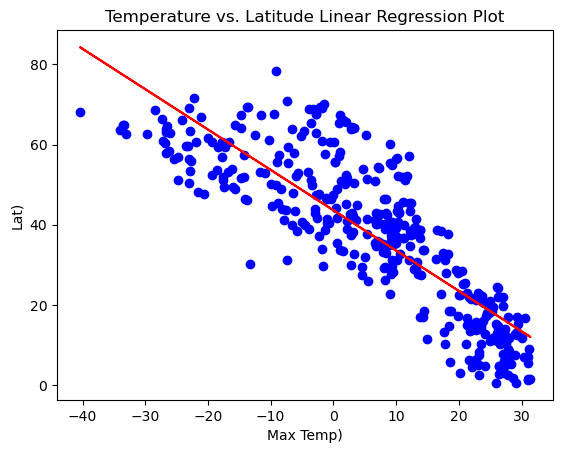

In [298]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Max Temp']
y_values = northern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker='o', color='b')
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(240,79),fontsize=15,color="red")
plt.title('Temperature vs. Latitude Linear Regression Plot')
plt.xlabel('Max Temp)')
plt.ylabel('Lat)')

# # Show the plot
plt.show()

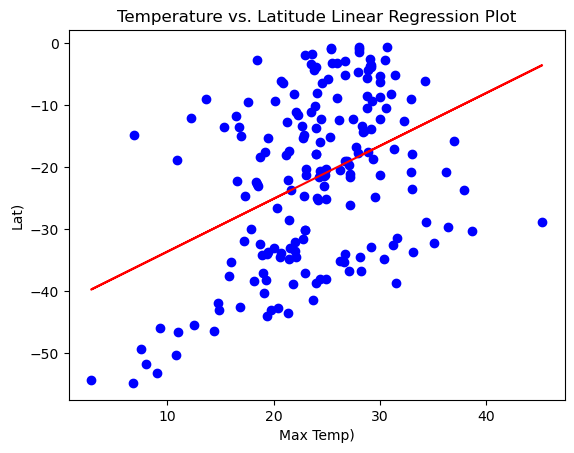

In [299]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Max Temp']
y_values = southern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker='o', color='b')
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(310,-10),fontsize=15,color="red")
plt.title('Temperature vs. Latitude Linear Regression Plot')
plt.xlabel('Max Temp)')
plt.ylabel('Lat)')

# # Show the plot
plt.show()

**Discussion about the linear relationship:** 
Northern Hempisphere: As Latitude Decreases; Temperature Increase (Inverse relationship)
Southern Hempisphere: As Latitude Increases; Temperature Increase

### Humidity vs. Latitude Linear Regression Plot

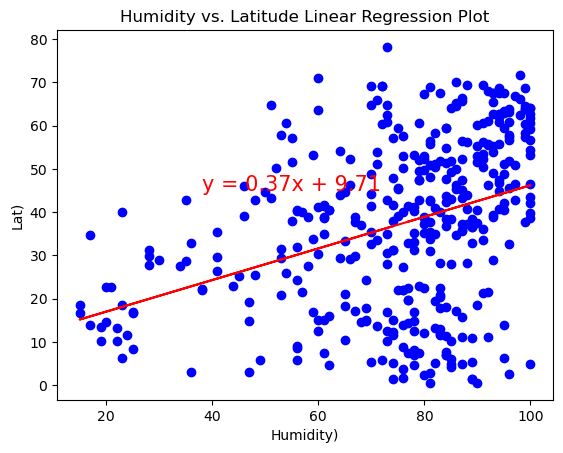

In [300]:
# Northern Hemisphere
x_values = northern_hemi_df['Humidity']
y_values = northern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker='o', color='b')
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(38,45),fontsize=15,color="red")
plt.title('Humidity vs. Latitude Linear Regression Plot')
plt.xlabel('Humidity)')
plt.ylabel('Lat)')

# # Show the plot
plt.show()

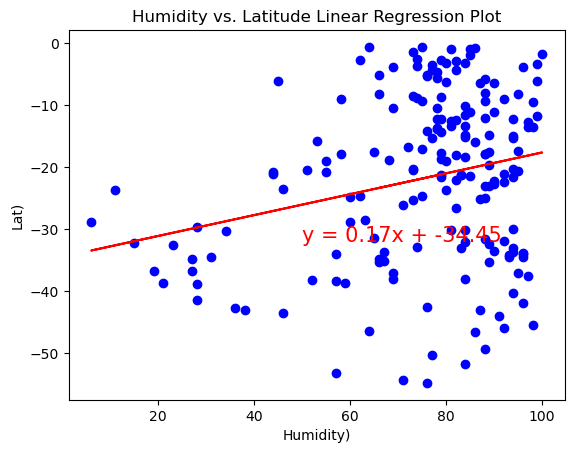

In [301]:
# Southern Hemisphere
x_values = southern_hemi_df['Humidity']
y_values = southern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker='o', color='b')
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(50,-32),fontsize=15,color="red")
plt.title('Humidity vs. Latitude Linear Regression Plot')
plt.xlabel('Humidity)')
plt.ylabel('Lat)')

# # Show the plot
plt.show()

**Discussion about the linear relationship:** 
Northern Hempisphere: As Latitude Iecreases; Humidity Increase 
Southern Hempisphere: As Latitude Increases; Humidity Increase

### Cloudiness vs. Latitude Linear Regression Plot

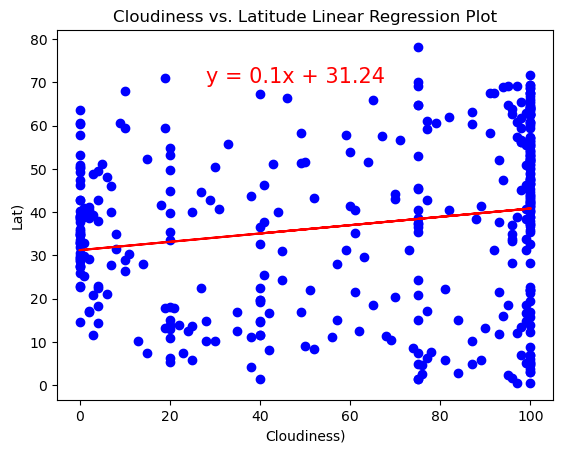

In [302]:
# Northern Hemisphere
x_values = northern_hemi_df['Cloudiness']
y_values = northern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker='o', color='b')
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(28,70),fontsize=15,color="red")
plt.title('Cloudiness vs. Latitude Linear Regression Plot')
plt.xlabel('Cloudiness)')
plt.ylabel('Lat)')

# # Show the plot
plt.show()

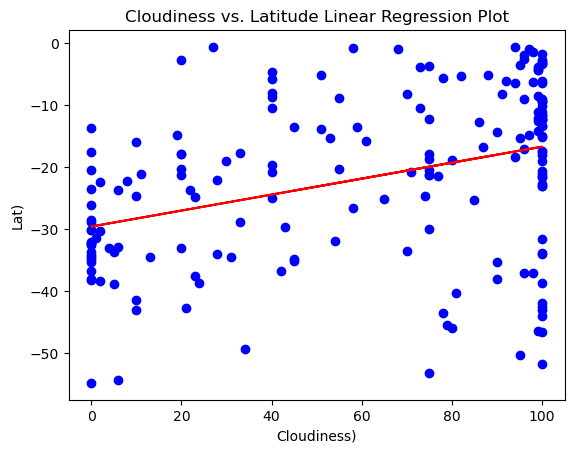

In [303]:
# Southern Hemisphere
x_values = southern_hemi_df['Cloudiness']
y_values = southern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker='o', color='b')
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(28,70),fontsize=15,color="red")
plt.title('Cloudiness vs. Latitude Linear Regression Plot')
plt.xlabel('Cloudiness)')
plt.ylabel('Lat)')

# # Show the plot
plt.show()

**Discussion about the linear relationship:**
No correlation between Cloudiness and Latitude; regardless of the hemisphere

### Wind Speed vs. Latitude Linear Regression Plot

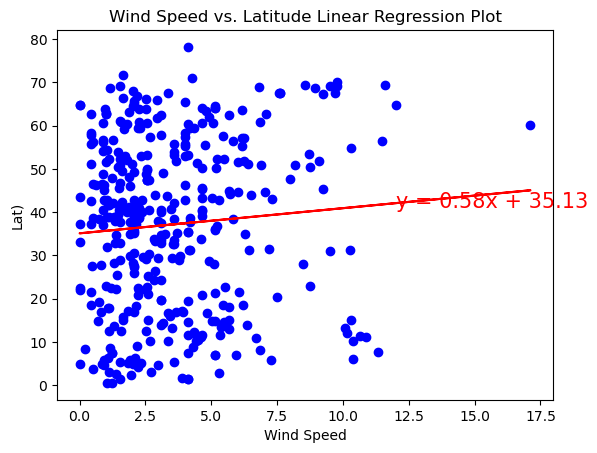

In [304]:
# Northern Hemisphere
x_values = northern_hemi_df['Wind Speed']
y_values = northern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker='o', color='b')
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(12,41),fontsize=15,color="red")
plt.title('Wind Speed vs. Latitude Linear Regression Plot')
plt.xlabel('Wind Speed')
plt.ylabel('Lat)')

# # Show the plot
plt.show()

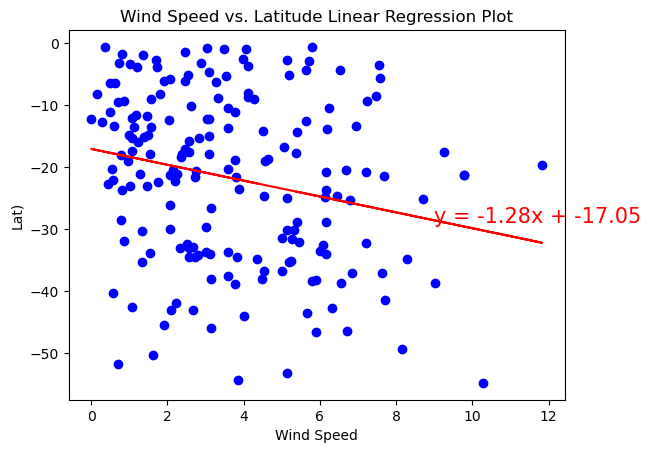

In [305]:
# Southern Hemisphere
x_values = southern_hemi_df['Wind Speed']
y_values = southern_hemi_df['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker='o', color='b')
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(9,-29),fontsize=15,color="red")
plt.title('Wind Speed vs. Latitude Linear Regression Plot')
plt.xlabel('Wind Speed')
plt.ylabel('Lat)')

# # Show the plot
plt.show()

**Discussion about the linear relationship:** 
Regardless of Hemisphere Wind Speed remains mostly concentrated below 10mph for majority of the cities.
